<a href="https://colab.research.google.com/github/vinods03/deep_learning/blob/main/CNN_Pneumonia_detection_Binary_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
base_dir = '/content/drive/MyDrive/chest_xray/train'

In [4]:
translate = {'NORMAL': 0, 'PNEUMONIA': 1}

In [5]:
import os

dataset = []

for i in os.listdir(base_dir):
  dataset.append(os.path.join(base_dir, i))

dataset

['/content/drive/MyDrive/chest_xray/train/PNEUMONIA',
 '/content/drive/MyDrive/chest_xray/train/NORMAL']

In [6]:
test_dir = '/content/drive/MyDrive/chest_xray/test'

In [7]:
import os

testset = []

for i in os.listdir(test_dir):
  testset.append(os.path.join(test_dir, i))

testset

['/content/drive/MyDrive/chest_xray/test/NORMAL',
 '/content/drive/MyDrive/chest_xray/test/PNEUMONIA']

In [8]:
for i in dataset:
  label = i.split('/')[-1]
  print('The number of images in ', label, ' folder of dataset is: ', len(os.listdir(i)))

The number of images in  PNEUMONIA  folder of dataset is:  3875
The number of images in  NORMAL  folder of dataset is:  1341


In [9]:
for i in testset:
  label = i.split('/')[-1]
  print('The number of images in ', label, ' folder of testset is: ', len(os.listdir(i)))

The number of images in  NORMAL  folder of testset is:  234
The number of images in  PNEUMONIA  folder of testset is:  390


In [10]:
# convert 1 sample image into an array

from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/chest_xray/train/PNEUMONIA/person4_bacteria_14.jpeg')
img = img_to_array(img)
img = img/255
print(img.shape)

(592, 1032, 3)


In [11]:
img[0][0][0]

0.2901961

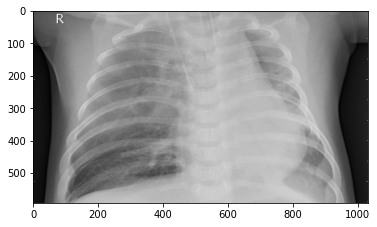

In [12]:
# get back the image from the array

import matplotlib.pyplot as plt
plt.imshow(img)

In [13]:
image_array = []
image_label = []

for i in dataset:
  for (n, j) in enumerate(os.listdir(i)):
    # if (n < 1201):
      img_path = os.path.join(i,j)
      img = load_img(img_path, target_size=(256, 256))
      img = img_to_array(img)
      img = img/255.0
      image_array.append(img)
      label = translate[i.split('/')[-1]]
      image_label.append(label)

In [14]:
set(image_label)

{0, 1}

In [15]:
X_test = []
y_test = []

for i in testset:
  for (n, j) in enumerate(os.listdir(i)):
    # if (n < 1201):
      img_path = os.path.join(i,j)
      img = load_img(img_path, target_size=(256, 256))
      img = img_to_array(img)
      img = img/255.0
      X_test.append(img)
      label = translate[i.split('/')[-1]]
      y_test.append(label)

In [16]:
set(y_test)

{0, 1}

In [17]:
import numpy as np

image_array = np.array(image_array)
image_label = np.array(image_label)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(image_array.shape)
print(image_label.shape)
print(X_test.shape)
print(y_test.shape)

(5216, 256, 256, 3)
(5216,)
(624, 256, 256, 3)
(624,)


In [18]:
# Not needed because we already have separate training and test data

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(image_array, image_label, test_size = 0.2)

In [19]:
c = len(set(image_label))
print('The number of classes is: ', c)

The number of classes is:  2


In [20]:
# Build the model

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [21]:
image_array[0].shape
i = Input(shape = image_array[0].shape)

x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
# x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same')(i)
# x = BatchNormalization()(x)

x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
# x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
# x = BatchNormalization()(x)

# x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
# x = BatchNormalization()(x)
# x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
# x = BatchNormalization()(x)

# x = Conv2D(256, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
# x = BatchNormalization()(x)
# x = Conv2D(256, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
# x = BatchNormalization()(x)

# x = Conv2D(512, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
# x = BatchNormalization()(x)
# x = Conv2D(512, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
# x = BatchNormalization()(x)

x = GlobalMaxPooling2D()(x)
# x = Flatten()(x)

# x = Dropout(0.2)(x)
# x = Dense(128, activation = 'relu')(x)

x = Dropout(0.2)(x)
x = Dense(256, activation = 'relu')(x)

# x = Dropout(0.2)(x)
# x = Dense(1024, activation = 'relu')(x)

x = Dropout(0.2)(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

In [22]:
# compile and fit

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
r = model.fit(image_array, image_label, validation_data = (X_test, y_test), epochs = 15)

Epoch 1/15
163/163 [==============================] - 16s 29ms/step - loss: 0.6181 - accuracy: 0.7634 - val_loss: 0.6821 - val_accuracy: 0.4615
Epoch 2/15
163/163 [==============================] - 4s 25ms/step - loss: 0.3289 - accuracy: 0.8507 - val_loss: 0.5181 - val_accuracy: 0.8365
Epoch 3/15
163/163 [==============================] - 4s 25ms/step - loss: 0.3050 - accuracy: 0.8625 - val_loss: 0.4229 - val_accuracy: 0.8317
Epoch 4/15
163/163 [==============================] - 4s 25ms/step - loss: 0.2809 - accuracy: 0.8762 - val_loss: 0.4052 - val_accuracy: 0.8381
Epoch 5/15
163/163 [==============================] - 4s 24ms/step - loss: 0.2598 - accuracy: 0.8911 - val_loss: 0.5339 - val_accuracy: 0.7756
Epoch 6/15
163/163 [==============================] - 4s 25ms/step - loss: 0.2483 - accuracy: 0.8957 - val_loss: 0.6307 - val_accuracy: 0.7276
Epoch 7/15
163/163 [==============================] - 4s 25ms/step - loss: 0.2387 - accuracy: 0.8999 - val_loss: 0.6900 - val_accuracy: 0.684

In [23]:
# Data Augmentation

# batch_size = 32
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1)
# train_generator = data_generator.flow(image_array, image_label, batch_size)
# steps_per_epoch = image_array.shape[0] // batch_size

# r = model.fit_generator(train_generator, validation_data = (X_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 10)

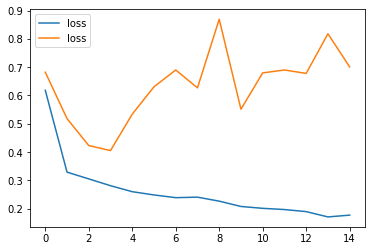

In [24]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'loss')
plt.legend()

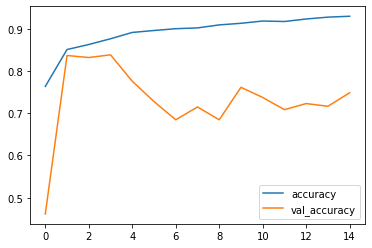

In [25]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [26]:
X_test.shape

(624, 256, 256, 3)

In [27]:
y_test_pred = model.predict(X_test)

In [28]:
y_test_pred

array([[0.9019611 ],
       [0.7832539 ],
       [0.55722755],
       [0.76350224],
       [0.10271834],
       [0.4069961 ],
       [0.6141931 ],
       [0.49162307],
       [0.7078015 ],
       [0.32798997],
       [0.6951606 ],
       [0.42628706],
       [0.26306665],
       [0.46101627],
       [0.5126291 ],
       [0.38646835],
       [0.448088  ],
       [0.2812878 ],
       [0.57230896],
       [0.65518624],
       [0.962647  ],
       [0.44893903],
       [0.37060422],
       [0.7188886 ],
       [0.40787077],
       [0.6222244 ],
       [0.5923287 ],
       [0.5596847 ],
       [0.57478136],
       [0.09382559],
       [0.6685679 ],
       [0.5226751 ],
       [0.45296636],
       [0.9987463 ],
       [0.96238315],
       [0.23248947],
       [0.49013937],
       [0.9944112 ],
       [0.9562764 ],
       [0.91056514],
       [0.9945918 ],
       [0.46051294],
       [0.16123468],
       [0.95853484],
       [0.8142889 ],
       [0.8887689 ],
       [0.190611  ],
       [0.999

In [29]:
y_test_pred_decoded = y_test_pred > 0.5

In [30]:
y_test_pred_decoded

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [31]:
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(y_test, y_test_pred_decoded)
accuracy = metrics.accuracy_score(y_test, y_test_pred_decoded)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_test_pred_decoded, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred_decoded, average = 'weighted')
f1 = metrics.f1_score(y_test, y_test_pred_decoded, average = 'weighted')

print('accuracy: ', accuracy)
print('error: ', error)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

print('\n')
print('The confusion matrix is: ')
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_decoded))

accuracy:  0.7483974358974359
error:  0.2516025641025641
precision:  0.7590145642471223
recall:  0.7483974358974359
f1:  0.7269342111406826


The confusion matrix is: 
[[103 131]
 [ 26 364]]
              precision    recall  f1-score   support

           0       0.80      0.44      0.57       234
           1       0.74      0.93      0.82       390

    accuracy                           0.75       624
   macro avg       0.77      0.69      0.70       624
weighted avg       0.76      0.75      0.73       624



In [32]:
# Now given an x-ray lets predict

img = load_img('/content/drive/MyDrive/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg', target_size = (256,256))
img = img_to_array(img)
img = img / 255
img = np.expand_dims(img, axis = 0)
print(img.shape)

prediction = model.predict(img)
prediction = (prediction > 0.5)
prediction = prediction[0][0]
prediction

reverse_translate = {0: 'NORMAL', 1: 'PNEUMONIA'}
print('The given sample is', reverse_translate[prediction])

(1, 256, 256, 3)
The given sample is NORMAL


In [33]:
img = load_img('/content/drive/MyDrive/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg', target_size = (256,256))
img = img_to_array(img)
img = img / 255
img = np.expand_dims(img, axis = 0)
img.shape

prediction = model.predict(img)
prediction = (prediction > 0.5)
prediction = prediction[0][0]
prediction

reverse_translate = {0: 'NORMAL', 1: 'PNEUMONIA'}
print('The given sample is', reverse_translate[prediction])

The given sample is PNEUMONIA
